In [2]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

# Задание 1

In [46]:
# Рассмотрим данные
X =np.array([[4, 2.9],
             [2.5, 1],
             [3.5, 4],
             [2, 2.1]])

# Есть ядро (функция сходства): K(xi, xj) = ||xi - xj||^2
K = lambda xi, xj: np.linalg.norm(xi - xj)**2

In [47]:
# Рассчитайте ядерную матрицу
N = len(X)
K_matrix = np.array( [[K(X[i], X[j]) for j in range(N)] for i in range(N)] )

K_matrix

array([[ 0.  ,  5.86,  1.46,  4.64],
       [ 5.86,  0.  , 10.  ,  1.46],
       [ 1.46, 10.  ,  0.  ,  5.86],
       [ 4.64,  1.46,  5.86,  0.  ]])

# Задание 2

In [5]:
# Рассмотрим данные в виде матрицы D:
D = np.array([[8, -20],
              [0, -1],
              [10, -19],
              [10, -20],
              [2, 0]])

In [6]:
# 1. Рассчитайте среднее m 
mean = [np.mean(D[:, 0]), np.mean(D[:, 1])]
mean

[6.0, -12.0]

In [49]:
# и ковариационную матрицу e для матрицы D
cov_m = np.cov(D.T)
cov_m

array([[ 22. , -47.5],
       [-47.5, 110.5]])

In [50]:
# 2. Рассчитайте собственные числа для матрицы e
np.linalg.eigvals(cov_m)

array([  1.33226359, 131.16773641])

In [52]:
# 3. Какой “внутренний” размер данного набора данных?
D.shape[0]

5

In [10]:
# 4. Рассчитай первый главный компонент
pca_data = PCA(n_components=1).fit_transform(D)
pca_data[:, 0]

array([-8.13363886, 12.4804344 , -8.01463621, -8.93159638, 12.59943705])

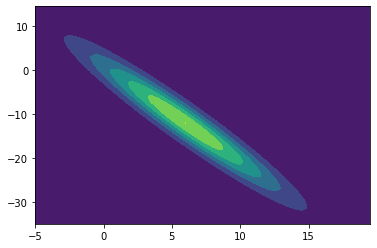

In [11]:
# 5. Если m и  e сверху характеризуют нормальное распределение, из которого были сгенерированы точки, 
# нарисуйте ориентацию / протяженность 2-мерной функции нормальной плотности.
rv = stats.multivariate_normal(mean, cov_m)

x, y = np.mgrid[-5:20:0.5, -35:15:0.5]
pos = np.dstack((x, y))
ax = plt.subplot()
ax.contourf(x, y, rv.pdf(pos))
plt.show()


# Задание 3 

In [54]:
# Для данных и ядра из первого задания найдите первую главную компоненту при нелинейном преобразовании 
# для заданного ядра
N = len(X)
center = np.diag([1] * N) - 1 / N * np.ones((N, N))
K_c = center @ K_matrix @ center
kcpa_data = KernelPCA(n_components=1, kernel='precomputed').fit_transform(K_c)
kcpa_data[:, 0]

array([ 3.69853449e-08, -1.27709306e-08, -1.27709306e-08,  3.69853449e-08])